In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset
df = pd.read_csv("/content/cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
# Checking the overall information on the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
# Checking the descriptive stats of the numeric values present in the data
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


The minimum value for carbo, sugars, potass is -1!

In [5]:
# Handling the negative values
for col in ['carbo','sugars','potass']:
  df[col]=df[col].fillna(df[col].mean())

In [6]:
# Checking for missing values
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# No of unique values present in the dataframe
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [9]:
# Map the manufacturer codes to their full names
manufacturer_mapping = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}
# Replacing the manufacturer codes with their full names in the 'mfr' column
df['mfr'] = df['mfr'].map(manufacturer_mapping)

In [10]:
#Unique manufacturers
unique_manufacturers = df['mfr'].unique()
print("Unique manufacturers:", unique_manufacturers)

Unique manufacturers: ['Nabisco' 'Quaker Oats' 'Kelloggs' 'Ralston Purina' 'General Mills'
 'Post' 'American Home Food Products']


In [11]:
# The distribution of cereal types (cold vs hot)
cereal_type_counts = df['type'].value_counts()
print("Cereal Type Distribution:\n", cereal_type_counts)

Cereal Type Distribution:
 C    74
H     3
Name: type, dtype: int64


#Exploratory Data Analysis

<ipython-input-12-f01fbc447237>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

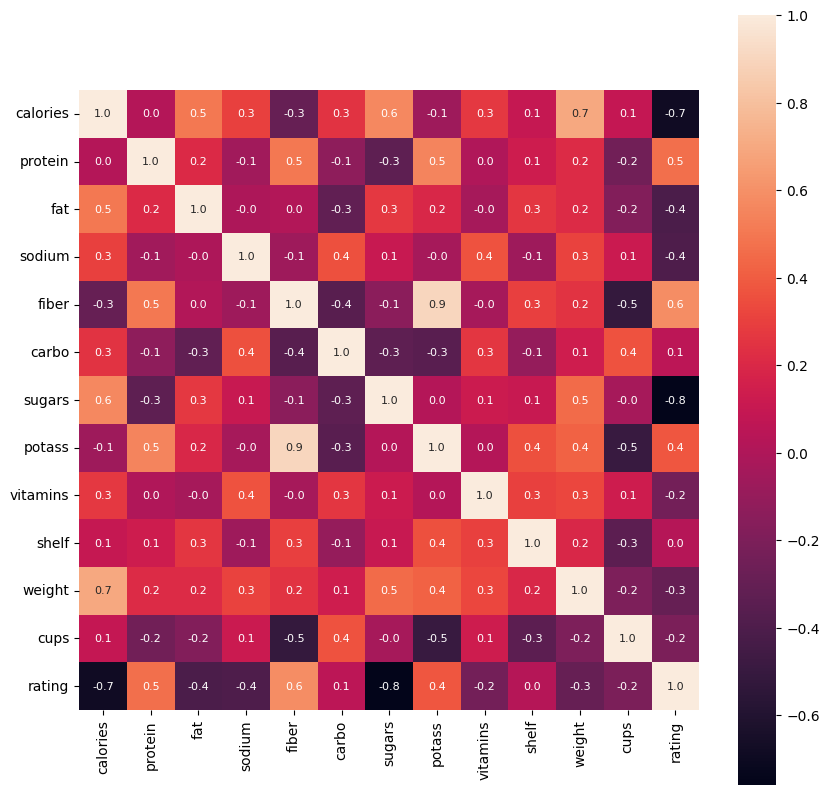

In [12]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})

In [13]:
correlation['rating'].sort_values(ascending=False)

rating      1.000000
fiber       0.584160
protein     0.470618
potass      0.380165
carbo       0.052055
shelf       0.025159
cups       -0.203160
vitamins   -0.240544
weight     -0.298124
sodium     -0.401295
fat        -0.409284
calories   -0.689376
sugars     -0.759675
Name: rating, dtype: float64

The rating is strongly correlated with protein , fiber, potassium, shelf, carbohydrates.

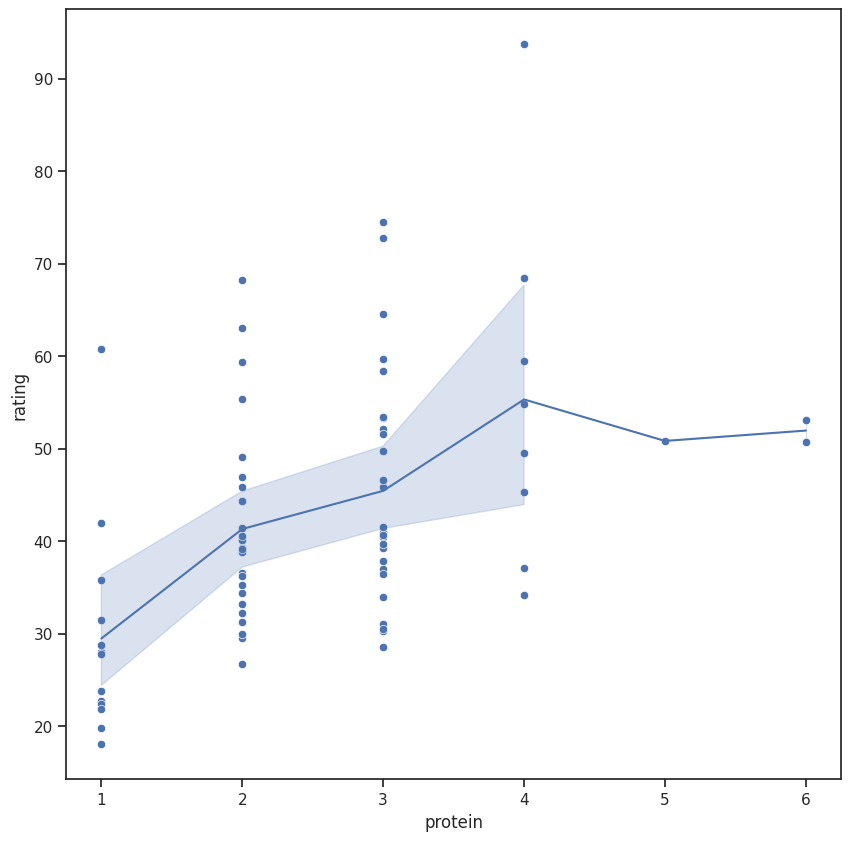

In [14]:
# Visualization of how protein impacts rating
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="protein", y="rating")
sns.lineplot(data=df, x="protein", y="rating")
plt.show()

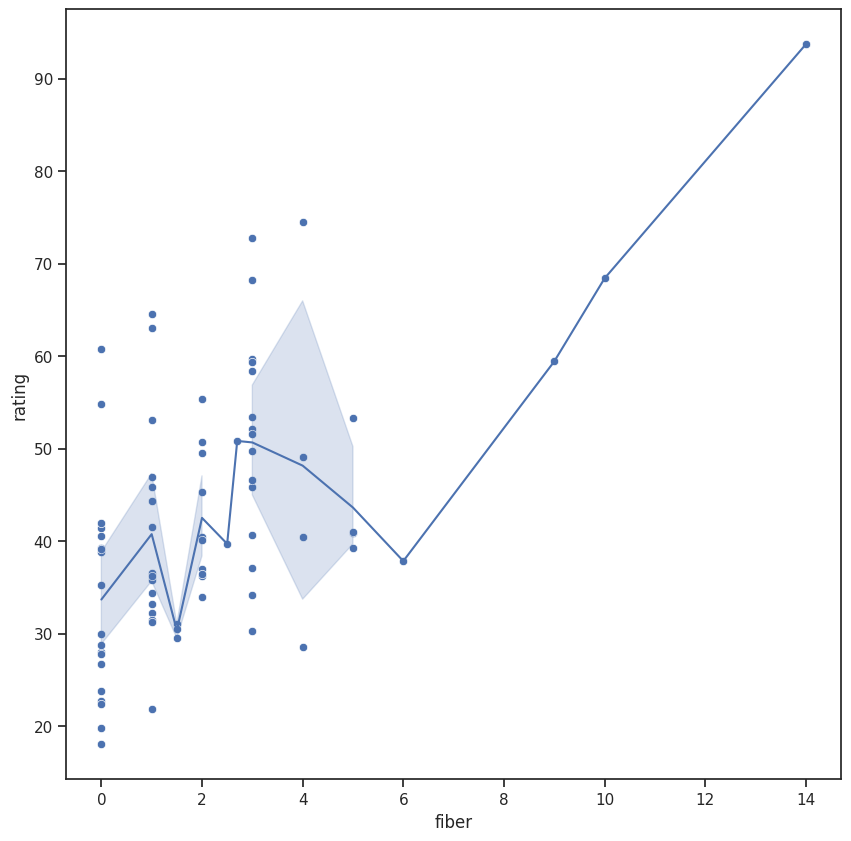

In [15]:
# Visualization of how fiber impacts rating
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="fiber", y="rating")
sns.lineplot(data=df, x="fiber", y="rating")
plt.show()

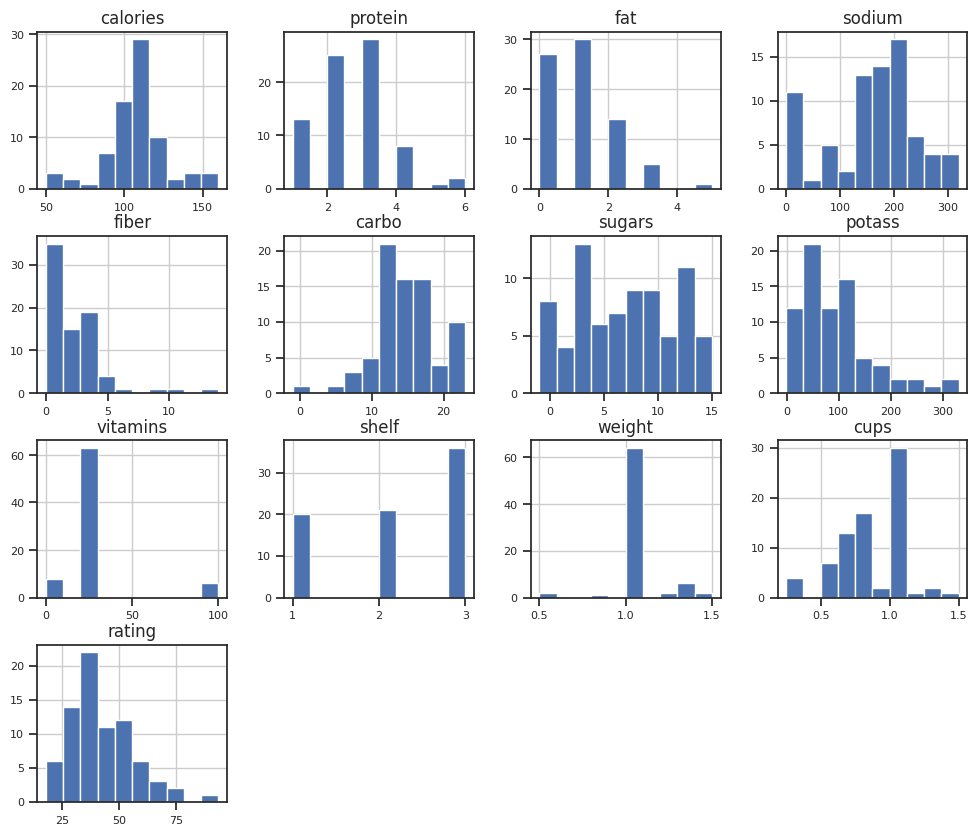

In [16]:
# Histogram of the dataset
df.hist(figsize=(12,10),xlabelsize=8,ylabelsize=8)
plt.show()

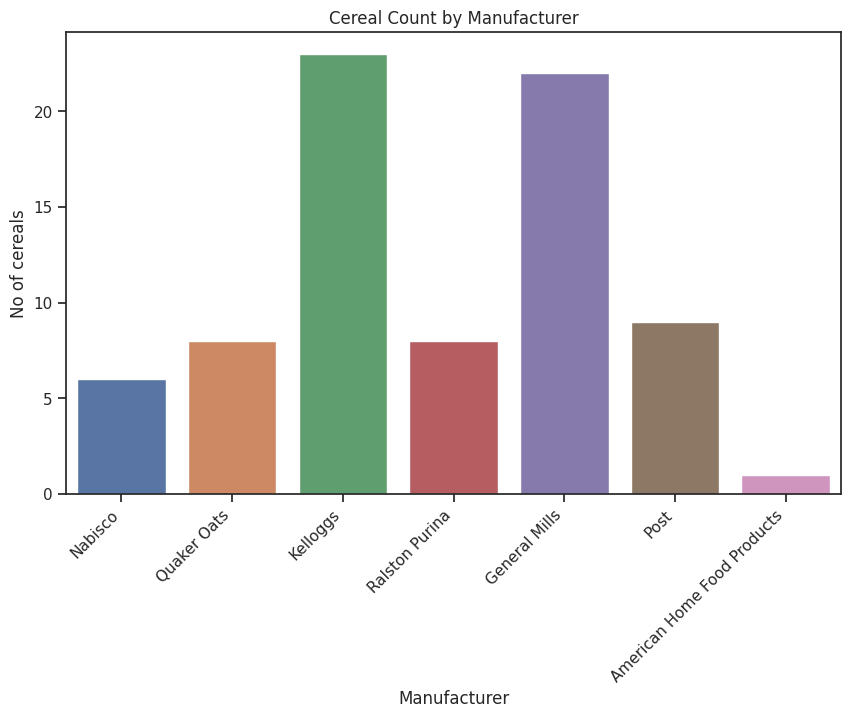

In [17]:
# The count of cereals by manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('No of cereals')
plt.title('Cereal Count by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.show()

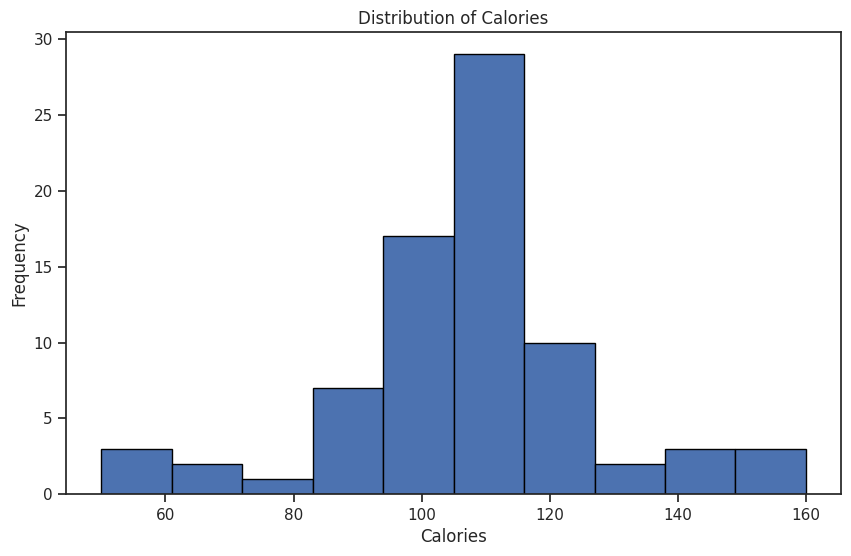

In [18]:
# Histogram for the distribution of calories
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=10, edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

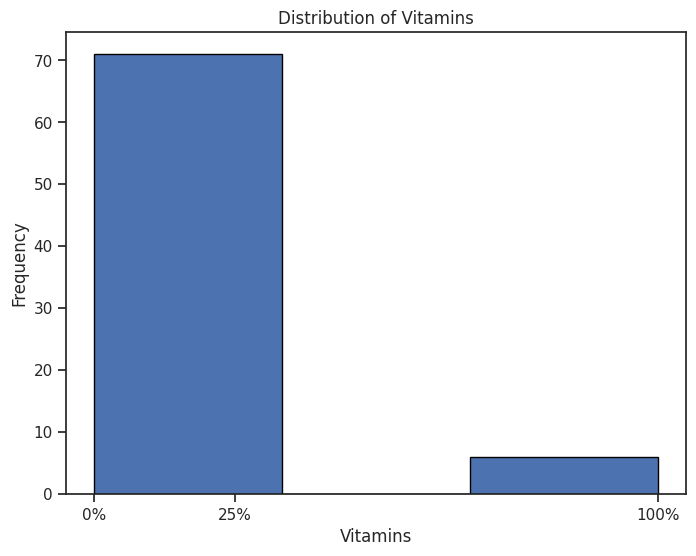

In [19]:
vitamins_stats = df['vitamins'].describe()
# Visualization of the distribution of vitamins
plt.figure(figsize=(8, 6))
plt.hist(df['vitamins'], bins=3, edgecolor='black')
plt.xlabel('Vitamins')
plt.ylabel('Frequency')
plt.title('Distribution of Vitamins')
plt.xticks([0, 25, 100], ['0%', '25%', '100%'])
plt.show()

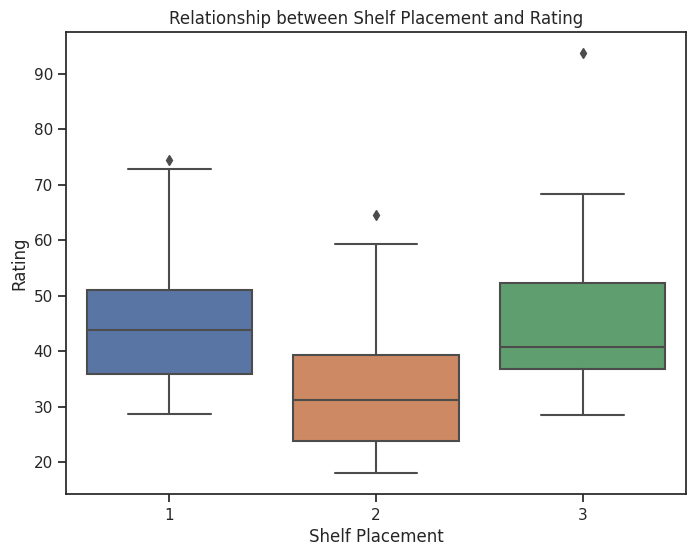

In [20]:
rating_stats = df.groupby('shelf')['rating'].describe()
# Box plot of rating by shelf placement
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='shelf', y='rating')
plt.xlabel('Shelf Placement')
plt.ylabel('Rating')
plt.title('Relationship between Shelf Placement and Rating')
plt.show()
# shelf: display shelf (1, 2, or 3, counting from the floor)

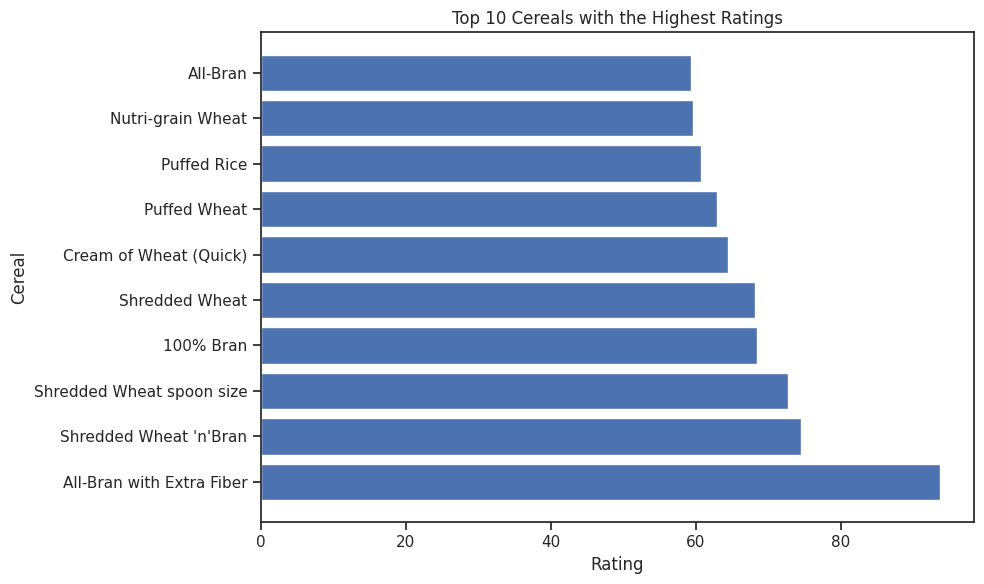

In [21]:
# Select the top 10 cereals with the highest ratings
top_10_cereals = df.nlargest(10, 'rating')
plt.figure(figsize=(10, 6))
plt.barh(top_10_cereals['name'], top_10_cereals['rating'])
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Top 10 Cereals with the Highest Ratings')
plt.tight_layout()
plt.show()

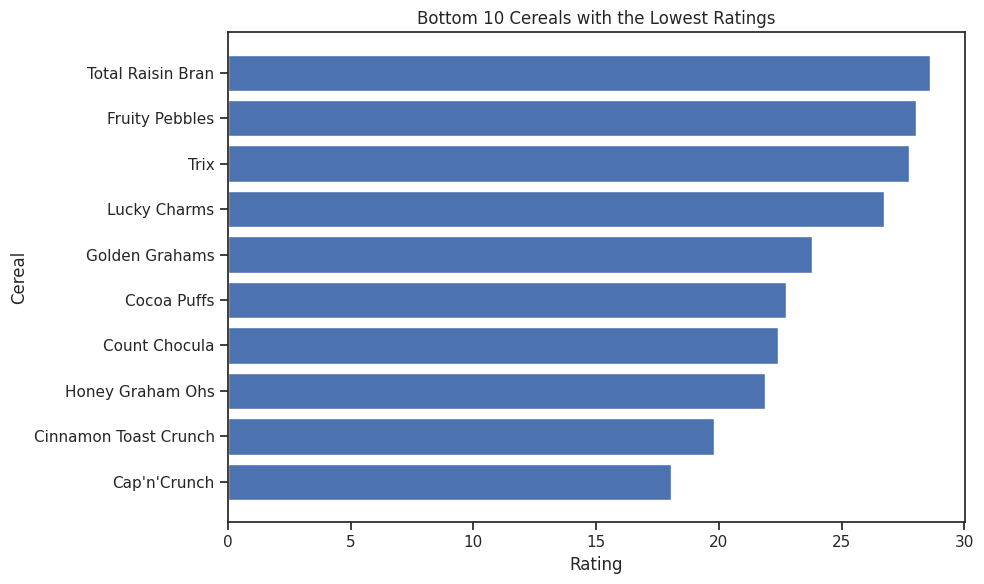

In [22]:
# Select the bottom 10 cereals with the lowest ratings
bottom_10_cereals = df.nsmallest(10, 'rating')
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_cereals['name'], bottom_10_cereals['rating'])
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Bottom 10 Cereals with the Lowest Ratings')
plt.tight_layout()
plt.show()

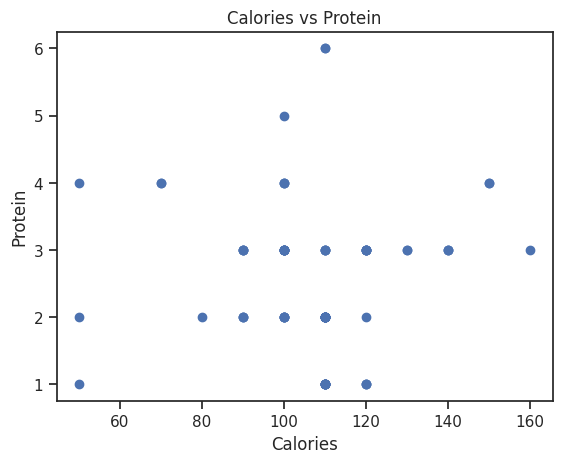

In [23]:
# Scatter plot of Calories vs Protein
plt.scatter(df['calories'], df['protein'])
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Calories vs Protein')
plt.show()

<Figure size 1200x600 with 0 Axes>

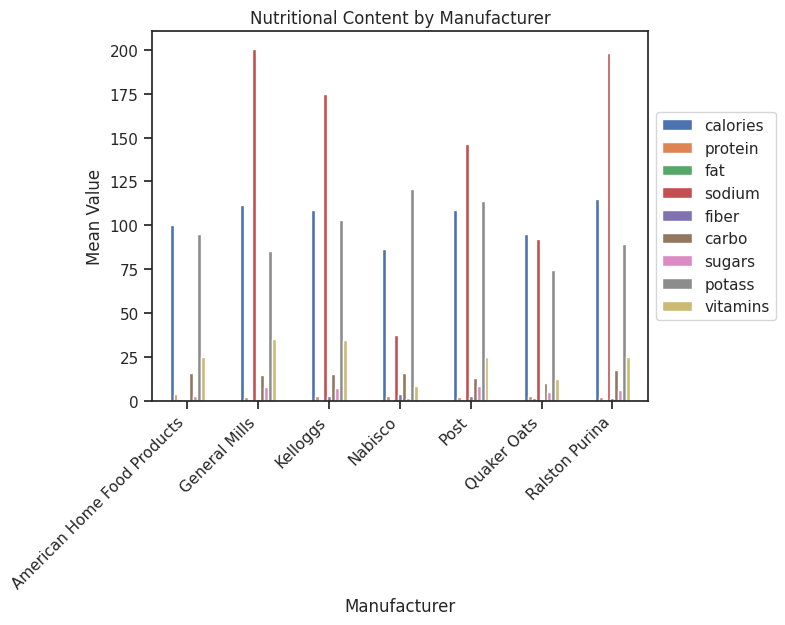

In [24]:
# Grouped bar plot of Nutritional content by Manufacturer
nutritional_factors = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
manufacturer_labels = ['American Home Food Products', 'General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']

# Calculate the mean values for each nutritional factor and manufacturer
mean_values = df.groupby('mfr')[nutritional_factors].mean()

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
ax = mean_values.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Value')
plt.title('Nutritional Content by Manufacturer')
ax.legend(nutritional_factors, loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend to the right
plt.xticks(range(len(manufacturer_labels)), manufacturer_labels, rotation='horizontal')
plt.xticks(rotation=45, ha='right')
plt.show()

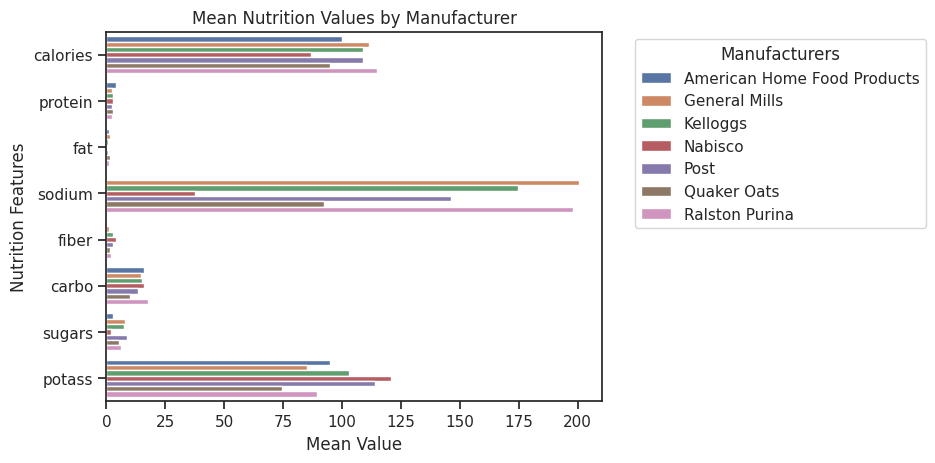

In [25]:
# Select the relevant columns for nutrition features
nutrition_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']

# Create a new DataFrame with only the nutrition columns
nutrition_data = df[nutrition_cols]

# Group the data by manufacturer and calculate the mean values for each nutrition feature
mean_nutrition = nutrition_data.groupby(df['mfr']).mean()

# Reset the index to have 'mfr' as a column
mean_nutrition.reset_index(inplace=True)

# Melt the DataFrame to convert it into a long format
melted_nutrition = pd.melt(mean_nutrition, id_vars='mfr', var_name='nutrition', value_name='mean_value')

# Create the bar plot using seaborn
sns.barplot(x='mean_value', y='nutrition', hue='mfr', data=melted_nutrition)

# Set the plot title and labels
plt.title('Mean Nutrition Values by Manufacturer')
plt.xlabel('Mean Value')
plt.ylabel('Nutrition Features')

# Move the legend to the side and set the title
plt.legend(title='Manufacturers', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

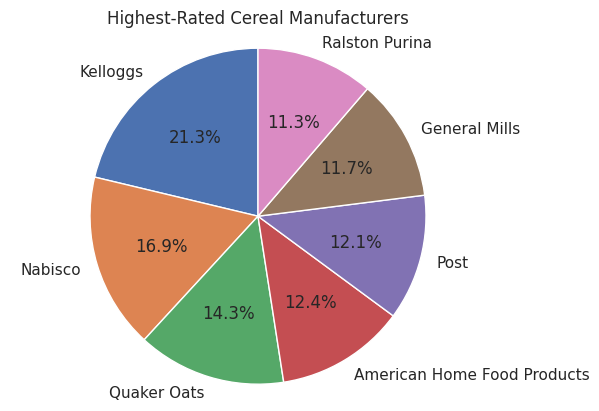

In [26]:
# Get the highest-rated cereals by manufacturer
highest_rating = df.groupby('mfr')['rating'].max().reset_index()

# Sort the data by rating in descending order
highest_rating = highest_rating.sort_values('rating', ascending=False)

# Get the manufacturer names and corresponding ratings
manufacturers = highest_rating['mfr'].tolist()
ratings = highest_rating['rating'].tolist()

# Create a pie chart
plt.pie(ratings, labels=manufacturers, autopct='%1.1f%%', startangle=90)

# Set the title of the pie chart
plt.title('Highest-Rated Cereal Manufacturers')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

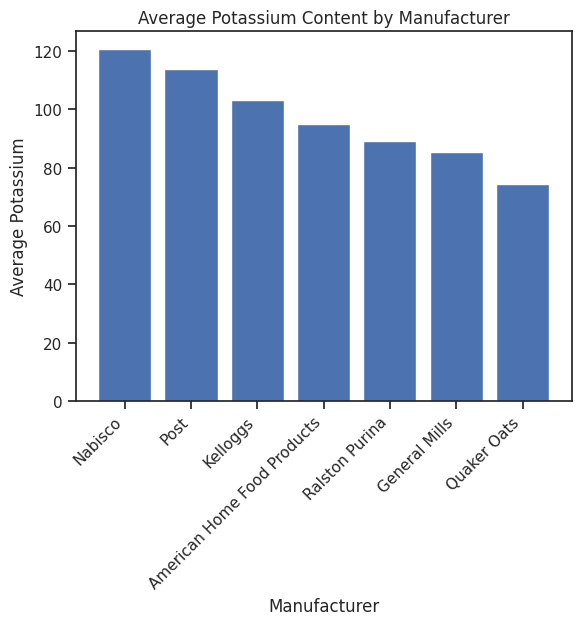

In [27]:
# Calculate the average potassium for each manufacturer
avg_potassium = df.groupby('mfr')['potass'].mean().reset_index()

# Sort the data by potassium in descending order
avg_potassium = avg_potassium.sort_values('potass', ascending=False)

# Plot the average potassium values
plt.bar(avg_potassium['mfr'], avg_potassium['potass'])

# Add labels and title
plt.xlabel('Manufacturer')
plt.ylabel('Average Potassium')
plt.title('Average Potassium Content by Manufacturer')
plt.xticks(rotation=45, ha='right')

# Annotate the highest potassium value if available
nabisco_potassium = avg_potassium.loc[avg_potassium['mfr'] == 'N', 'potass']
if not nabisco_potassium.empty:
    nabisco_potassium = nabisco_potassium.values[0]
    plt.annotate('Nabisco', (2, nabisco_potassium), xytext=(2.5, nabisco_potassium + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Display the plot
plt.show()